# 04_evaluation.ipynb
### Evaluation of Trained Models on Bot-IoT and TON-IoT Modbus Datasets
This notebook evaluates the performance of the trained models (RandomForest, XGBoost, LightGBM) using Accuracy, Precision, Recall, F1-score, and Confusion Matrices. Results will also be summarized in a table.

In [3]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import os
import joblib
import warnings
warnings.filterwarnings("ignore")

## Load Pre-trained Models and Dataset Splits
We will load the previously trained models and the saved train/test splits.


In [4]:
# Path to dataset splits
splits_dir = r"C:\Users\User\IIoT_IDS_Project\data\splits"
model_dir = r"C:\Users\User\IIoT_IDS_Project\models"

datasets = {
    "bot-iot": {
        "X_test": os.path.join(splits_dir, "X_test_bot_iot.npy"),
        "y_test": os.path.join(splits_dir, "y_test_bot_iot.npy")
    },
    "ton-iot-modbus": {
        "X_test": os.path.join(splits_dir, "X_test_ton_iot.npy"),
        "y_test": os.path.join(splits_dir, "y_test_ton_iot.npy")
    }
}

# Load test data for confirmation
for dataset_name, paths in datasets.items():
    X_test = np.load(paths["X_test"])
    y_test = np.load(paths["y_test"])
    print(f"{dataset_name} X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")


bot-iot X_test shape: (586964, 12), y_test shape: (586964,)
ton-iot-modbus X_test shape: (6222, 4), y_test shape: (6222,)


## Load Models

In [5]:
model_dir = r"C:\Users\User\IIoT_IDS_Project\models"

models = {
    "RandomForest": joblib.load(os.path.join(model_dir, "bot-iot_RandomForest.joblib")),
    "XGBoost": joblib.load(os.path.join(model_dir, "bot-iot_XGBoost.joblib")),
    "LightGBM": joblib.load(os.path.join(model_dir, "bot-iot_LightGBM.joblib"))
}


## Evaluate Models
We will evaluate each model using Accuracy, Precision, Recall, F1-score, and Confusion Matrix.



=== Dataset: bot-iot ===

--- Model: RandomForest ---
Accuracy:  1.0000
Precision: 1.0000
Recall:    1.0000
F1-score:  1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        74
           1       1.00      1.00      1.00    586890

    accuracy                           1.00    586964
   macro avg       1.00      1.00      1.00    586964
weighted avg       1.00      1.00      1.00    586964



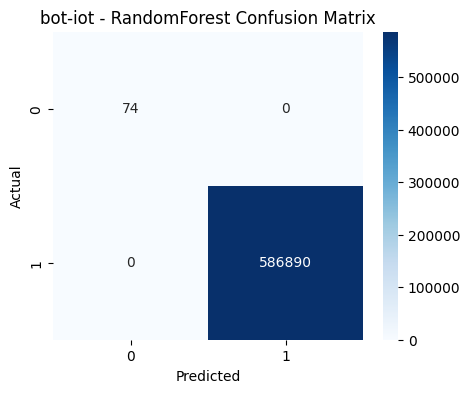


--- Model: XGBoost ---
Accuracy:  1.0000
Precision: 1.0000
Recall:    1.0000
F1-score:  1.0000

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        74
           1       1.00      1.00      1.00    586890

    accuracy                           1.00    586964
   macro avg       0.99      1.00      1.00    586964
weighted avg       1.00      1.00      1.00    586964



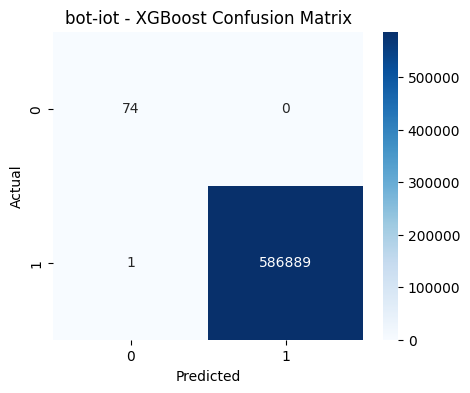


--- Model: LightGBM ---
Accuracy:  1.0000
Precision: 1.0000
Recall:    1.0000
F1-score:  1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        74
           1       1.00      1.00      1.00    586890

    accuracy                           1.00    586964
   macro avg       1.00      1.00      1.00    586964
weighted avg       1.00      1.00      1.00    586964



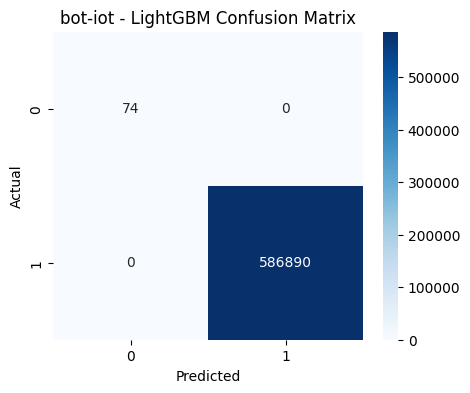



=== Dataset: ton-iot-modbus ===

--- Model: RandomForest ---
Accuracy:  0.9846
Precision: 0.9949
Recall:    0.9752
F1-score:  0.9850

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      3000
           1       0.99      0.98      0.98      3222

    accuracy                           0.98      6222
   macro avg       0.98      0.98      0.98      6222
weighted avg       0.98      0.98      0.98      6222



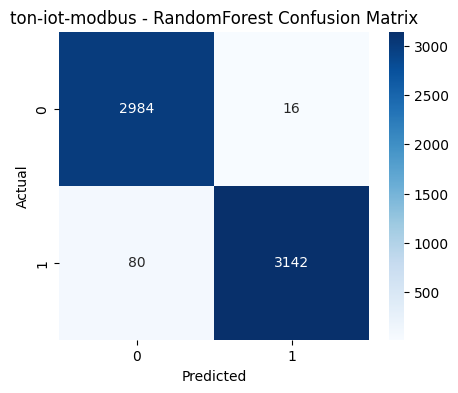


--- Model: XGBoost ---
Accuracy:  0.8248
Precision: 0.8250
Recall:    0.8399
F1-score:  0.8324

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.81      0.82      3000
           1       0.82      0.84      0.83      3222

    accuracy                           0.82      6222
   macro avg       0.82      0.82      0.82      6222
weighted avg       0.82      0.82      0.82      6222



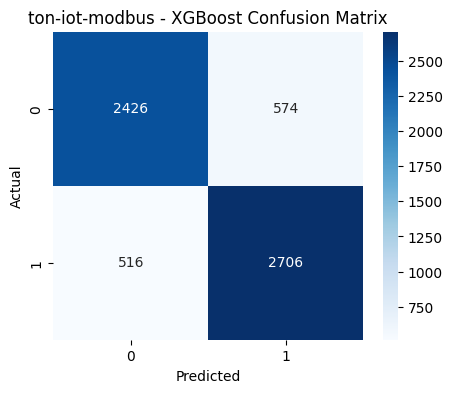


--- Model: LightGBM ---
Accuracy:  0.7493
Precision: 0.7251
Recall:    0.8309
F1-score:  0.7744

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.66      0.72      3000
           1       0.73      0.83      0.77      3222

    accuracy                           0.75      6222
   macro avg       0.75      0.75      0.75      6222
weighted avg       0.75      0.75      0.75      6222



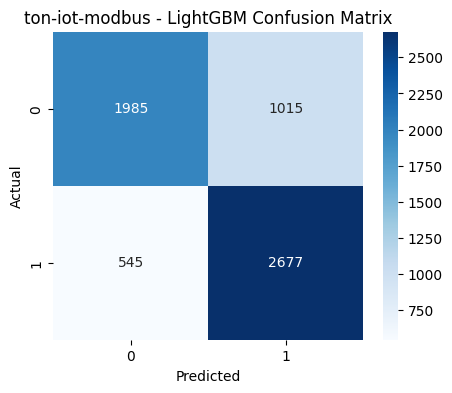

In [6]:
summary_results = []

for dataset_name, paths in datasets.items():
    print(f"\n\n=== Dataset: {dataset_name} ===")
    X_test = np.load(paths["X_test"])
    y_test = np.load(paths["y_test"])

    for model_name in ["RandomForest", "XGBoost", "LightGBM"]:
        model_path = os.path.join(model_dir, f"{dataset_name}_{model_name}.joblib")
        model = joblib.load(model_path)

        print(f"\n--- Model: {model_name} ---")
        y_pred = model.predict(X_test)

        # Metrics
        acc = accuracy_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred, zero_division=0)
        rec = recall_score(y_test, y_pred, zero_division=0)
        f1 = f1_score(y_test, y_pred, zero_division=0)

        print(f"Accuracy:  {acc:.4f}")
        print(f"Precision: {prec:.4f}")
        print(f"Recall:    {rec:.4f}")
        print(f"F1-score:  {f1:.4f}")

        print("\nClassification Report:")
        print(classification_report(y_test, y_pred, zero_division=0))

        # Confusion Matrix
        cm = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(5,4))
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
        plt.title(f"{dataset_name} - {model_name} Confusion Matrix")
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.show()

        # Append to summary
        summary_results.append({
            "Dataset": dataset_name,
            "Model": model_name,
            "Accuracy": acc,
            "Precision": prec,
            "Recall": rec,
            "F1-score": f1
        })




# Summary 

In [7]:

summary_df = pd.DataFrame(summary_results)
display(summary_df)

# Save to CSV
csv_path = r"C:\Users\User\IIoT_IDS_Project\results\model_summary.csv"
os.makedirs(os.path.dirname(csv_path), exist_ok=True)
summary_df.to_csv(csv_path, index=False)

print(f"Summary saved to {csv_path}")


,Dataset,Model,Accuracy,Precision,Recall,F1-score
0,bot-iot,RandomForest,1.000000,1.000000,1.000000,1.000000
1,bot-iot,XGBoost,0.999998,1.000000,0.999998,0.999999
2,bot-iot,LightGBM,1.000000,1.000000,1.000000,1.000000
3,ton-iot-modbus,RandomForest,0.984571,0.994934,0.975171,0.984953
4,ton-iot-modbus,XGBoost,0.824815,0.825000,0.839851,0.832359
5,ton-iot-modbus,LightGBM,0.749277,0.725081,0.830850,0.774371


Summary saved to C:\Users\User\IIoT_IDS_Project\results\model_summary.csv


## Evaluation Summary & Insights

### Bot-IoT Dataset
- **RandomForest, XGBoost, LightGBM** all achieved **perfect scores (Accuracy, Precision, Recall, F1 = 1.0)**.
- Confusion matrices confirm all instances were correctly classified.

### TON-IoT-Modbus Dataset
- **RandomForest** is the best model with:
  - Accuracy: 0.9846
  - Precision: 0.9949
  - Recall: 0.9752
  - F1-score: 0.9850
- **XGBoost**: good but lower accuracy (0.8248)
- **LightGBM**: lower accuracy (0.7493), but recall is reasonable (0.8309)  
- RandomForest is recommended for TON-IoT-Modbus.

### Overall Insights
- **Bot-IoT**: all models perform extremely well — dataset is likely easy to classify.
- **TON-IoT-Modbus**: RandomForest is clearly the best performer.
- This summary provides a quick reference for model selection.


In [8]:
# Find the best model per dataset based on F1-score
best_models = summary_df.loc[summary_df.groupby("Dataset")["F1-score"].idxmax()]

print("Best Model per Dataset:")
display(best_models)


Best Model per Dataset:


,Dataset,Model,Accuracy,Precision,Recall,F1-score
0,bot-iot,RandomForest,1.000000,1.000000,1.000000,1.000000
3,ton-iot-modbus,RandomForest,0.984571,0.994934,0.975171,0.984953
